# Análise descritiva

In [4]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [5]:
dados = pd.read_csv('dados/case_cientistaiii.csv', parse_dates=True, index_col='dt_referencia')
dados.head()

,cod_indicador,des_indicador,valor,origem,fator_comercial,cluster
dt_referencia,,,,,,
2018-01-01,11,Índice Geral,4930.72,Américas,1,4
2018-02-01,11,Índice Geral,4946.50,Américas,1,4
2018-03-01,11,Índice Geral,4950.95,Américas,1,4
2018-04-01,11,Índice Geral,4961.84,Américas,1,4
2018-05-01,11,Índice Geral,4981.69,Américas,1,4


In [6]:
# Veriricando a quantidade de ocorrências para cada indicador:

dados['des_indicador'].value_counts()

des_indicador
Índice Geral          60
Importações Europa    60
Derivados de leite    60
Gases                 60
Sementes              60
Frutas                60
Máquinas agrícolas    60
Grãos                 60
Ferramentas           60
Plásticos             60
Name: count, dtype: int64

In [7]:
# Analisando as estatisticas descritivas iniciais de acordo com a variável alvo:

dados.groupby('des_indicador')['valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
des_indicador,,,,,,,,
Derivados de leite,60.0,2703.39,2757.62,354.11,1112.78,1773.73,2982.02,15870.32
Ferramentas,60.0,12.41,4.04,7.64,9.39,10.06,15.96,20.00
Frutas,60.0,20.15,4.31,12.07,17.51,19.95,23.02,32.60
Gases,60.0,4.29,10.68,0.39,0.85,1.24,3.45,59.95
Grãos,60.0,0.50,0.13,0.31,0.40,0.49,0.58,0.83
Importações Europa,60.0,108.34,9.35,93.00,102.00,107.35,114.15,138.10
Máquinas agrícolas,60.0,3202.71,934.66,2081.26,2595.81,2806.56,3690.70,5199.50
Plásticos,60.0,9.30,0.98,7.42,8.62,9.24,9.58,12.64
Sementes,60.0,2.06,0.24,1.68,1.86,1.98,2.28,2.55


As categorias "Derivados de leite", "Máquinas agrícolas" e "Índice Geral" se destacam com valores médios e máximos muito altos, acompanhados de grandes desvios padrões, indicando grande variabilidade nos valores. Isso mostra que existe a presença de outliers ou uma distribuição muito assimétrica dentro dessas categorias.

Categorias como "Ferramentas", "Frutas", "Grãos", "Plásticos", e "Sementes" têm valores relativamente baixos, com pouca variação, indicando que os valores dentro dessas categorias são mais consistentes.

Como o case sugere para escolher 1 indicador da lista recebida, vamos escolher o "Índice Geral", por ter um valor representativo da base de dados (conforme painel PowerBi). Além disso "Índice Geral", pelo contexto, agrega vários fatores econômicos, o que pode refletir nas variações de preços de insumos como (custo de matérias-primas). Para o Boticário, que depende de matérias-primas naturais ter a previsibilidade nesse indicador é de grande importância.

Como segunda opção para uma análise seria o indicador "Plástico", pensando que a boticário quer eliminar a utilização de plástico, de acordo com a [Matéria](https://www.grupoboticario.com.br/midia/nova-fragrancia-arbo-puro-traz-formula-e-embalagem-sustentaveis/)

In [12]:
# Filtrando a base de dados

dados_ig = dados[dados['des_indicador'] == 'Índice Geral']
dados_ig.head()

,cod_indicador,des_indicador,valor,origem,fator_comercial,cluster
dt_referencia,,,,,,
2018-01-01,11,Índice Geral,4930.72,Américas,1,4
2018-02-01,11,Índice Geral,4946.50,Américas,1,4
2018-03-01,11,Índice Geral,4950.95,Américas,1,4
2018-04-01,11,Índice Geral,4961.84,Américas,1,4
2018-05-01,11,Índice Geral,4981.69,Américas,1,4


In [13]:
dados_ig.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2018-01-01 to 2022-12-01
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cod_indicador    60 non-null     int64  
 1   des_indicador    60 non-null     object 
 2   valor            60 non-null     float64
 3   origem           60 non-null     object 
 4   fator_comercial  60 non-null     int64  
 5   cluster          60 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 3.3+ KB


De acordo com a saída acima, pode-se observar que o conjunto de dados para sementes possui 60 linhas e um total de 6 colunas. Todas as colunas têm 60 valores não nulos, o que significa que não há valores ausentes no DataFrame.

In [16]:
# Verificando se há dados nulos para o conjunto de dados

dados_ig.isna().sum()

cod_indicador      0
des_indicador      0
valor              0
origem             0
fator_comercial    0
cluster            0
dtype: int64

In [18]:
print(f"Número de linhas duplicadas: {dados_ig.duplicated().sum()}")

Número de linhas duplicadas: 0


## Visualizando os dados

In [32]:
# Analisando a distribuição dos dados
fig = px.histogram(
    dados_ig, 
    x='valor', 
    nbins=30,
    title="Distribuição dos Valores do Índice Geral",
    labels={'valor': 'Valor do Índice Geral', 'count': 'Contagem'}
)

fig.show()

Percebe-se que a curva está concentrada à direita.

In [35]:
fig = px.line(dados_ig, x=dados_ig.index, y="valor", title='Valor do Índice Geral ao longo do tempo')
fig.update_xaxes(title_text='Data de Referência')
fig.show()

Observamos que o valor manteve um crescimento constante até junho de 2022, quando ocorreu uma queda, a partir de setembro do mesmo ano voltou a subir. Esse indica uma possível correção ou ajuste no mercado durante o período de declínio, seguido por uma recuperação.

Outro fator que pode ter influenciado o crescimento mais acentuado a partir de janeiro de 2021, bem como o declínio em meados de 2022, foi a pandemia.

In [39]:
dados_ig['mes'] = dados_ig.index.strftime('%B')
valor_mensal = dados_ig.groupby('mes', as_index=False)['valor'].mean()
ordem_mes = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']  

fig = px.bar(valor_mensal, 
             x='mes', 
             y='valor', 
             title="Valor por mês",
             category_orders= {'mes': ordem_mes}
             )
fig.update_xaxes(title_text='Mês')
fig.show()

Percebe-se que há um aumento progressivo mínimo nos valores mensais, o que pode indicar um leve efeito inflacionário que afeta o preço dos insumos com o passar do tempo. Ainda que mínimo, essa informação deve ser levada em consideração no longo prazo, principalmente devido à tendência de alta

In [43]:
media_movel = dados_ig['valor'].rolling(12).mean()
fig = px.line(dados_ig, x=dados_ig.index, y="valor", title='Valor ao longo do tempo (Média móvel 12 meses)')

fig.add_scatter(x=dados_ig.index, y=media_movel, 
                mode='lines', 
                name='Média Móvel', 
                line=dict(color='orange')) 

fig.update_xaxes(title_text='Data de Referência')
fig.update_yaxes(title_text='Valor')
fig.show()

O gráfico da média móvel deixa ainda mais evidente a tendência de crescimento a longo prazo  apesar de flutuações. Essa tendência pode refletir uma combinação de fatores econômicos aumento na demanda por insumos ou até mesmo alterações nos custos de produção. O crescimento acelerado após 2021 sugere que esses fatores se intensificaram, o que pode ser consequência da pandemia.

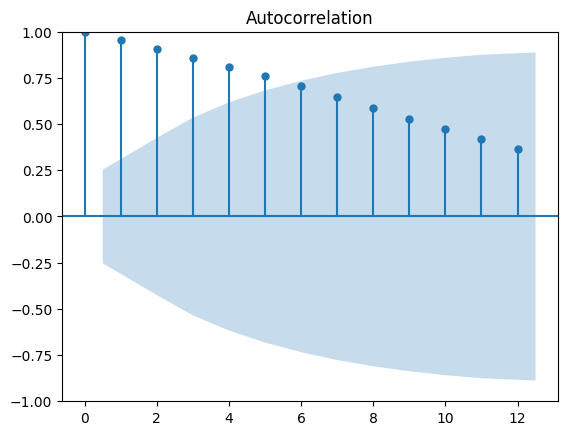

In [44]:
y = dados_ig['valor']
plot_acf(y, lags=12)
plt.show()

Por definição o lag 0 é 1.  Nos primeiros 5 lags (contando o 1), as barras estão acima da linha de significância (área sombreada), indicando uma forte autocorrelação positiva. Isso quer dizer que a série em um determinado mês está fortemente correlacionada com o valoes dos meses anteriores, indicando uma continuidade de crescimento. 

Após o quinto lag, a autocorrelação começa a decair gradualmente, indicando que a conforme passa o tempo, os meses tem uma menor autocorrelação com os meses anteriores. 

## Analisando sazonalidade
Ao contrário da análise de tendência, para analisar a sazonalidade precisaremos eliminar a tendência e para fazer isso vamos utilizar o conceito de *diferenças sucessivas*. Esse processo é utilizado para eliminar a tendência e é conhecido como procedimento para transformação de uma série não estacionária em uma série estacionária. 

A transformação mais comum consiste em tomar diferenças sucessivas da série original até se obter uma série estacionária. A primeira diferença $Z(t)$ é definida por

$$\Delta Z(t) = Z(t) - Z(t-1)$$

Isso mede a variação entre dois pontos consecutivos no tempo.

então a segunda diferença é,

$$\Delta^2 Z(t)=\Delta[\Delta Z(t)]=\Delta[Z(t) - Z(t - 1)]$$
$$\Delta^2 Z(t)=Z(t) - 2 Z(t - 1) + Z(t -2)$$

De modo geral, a n-ésima diferença de $Z(t)$ é

$$\Delta^n Z(t) = \Delta[\Delta^{n - 1}Z(t)]$$

Normalmente, será necessária somente uma ou duas diferenças para que a série se torne estacionária.

In [46]:
fig = px.line(dados_ig, x=dados_ig.index, y=dados_ig.valor.diff(), title='Valor ao longo do tempo')
fig.update_xaxes(title_text='Data de Referência')
fig.update_yaxes(title_text='Diferença')
fig.show()

O gráfico evidencia as flutuações ao longo do tempo, com picos de crescimento (valores altos de diferença positiva) e quedas significativas (valores negativos). Em março de 2022, percebe-se que o valor variou bastante, chegando a mais de 100. Por outro lado, em julho de 2022, observamos que houve uma queda de 43 em relação ao mês anterior, seguida de uma recuperação.

Percebe-se que em dezembro de 2019 e dezembro de 2020 houve momentos de alta.

In [54]:
dados_transformados = dados_ig.valor.diff().groupby(dados_ig.index.month).mean().reset_index()

fig = px.bar(dados_transformados, 
             x='dt_referencia', 
             y='valor', 
             title="Valor por mês (diff)",
             labels={'dt_referencia': 'Mês'}
             )
fig.show()

Há um padrão de aumento em certos meses do ano. Por exemplo, de janeiro a março, possui em média uma alta de crescimento constante, assim como no final do ano, em novembro e dezembro. Esses podem ser os meses economicamente mais significativos para o indicador. A queda de crescimento nos meses de abril, maio, julho e agosto sugere uma desaceleração do crescimento desse indicador.